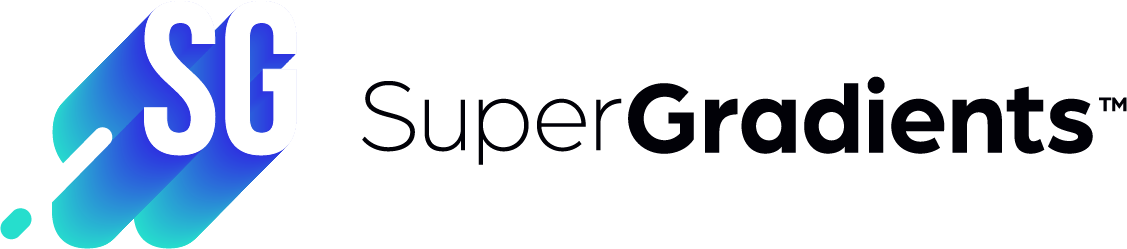

# SuperGradients How To Use a model to Predict

In this tutorial we will use SG pretrained models to predict on an image. 

The notebook is divided into 3 tasks:
1. Semantic segmentation
2. Object detection
3. Classification

Each task is divided into 3 sections:
1. Load an image
2. Load a pretrained model
3. Inferenece


#Install SG and deci's dependecies


In [1]:
! pip install super-gradients==3.1.1 gwpy &> /dev/null

In [2]:
! pip install matplotlib==3.1.3 &> /dev/null


# 1. Object detection

Object detection models support the `model.predict()` API, which simplifies the process of computing and showning predictions.

For more information on that, please check out the [documentation](https://docs.deci.ai/super-gradients/documentation/source/ModelPrediction.html)

For the sake of this presentation, We'll use COCO dataset that can be found [here](https://cocodataset.org/#home).

We will use `YoloX-NAS` model for inference.

### A. Load an image

When using `model.predict()`, you don't even need to download/load the image. Pass the full path or URL of your image(s) and the model will handle the rest.

In [1]:
image_path = "https://www.gulfplaceon30a.com/wp-content/uploads/2020/01/yolo1.jpg"


### B. Load a pretrained model

In [11]:
from super_gradients.training import models

# Get pretrained model from super-gradients repository.
model = models.get("yolo_nas_l", pretrained_weights="coco")

[2023-05-07 12:08:46] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


  0%|          | 0.00/256M [00:00<?, ?B/s]

Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth


### C. Inference

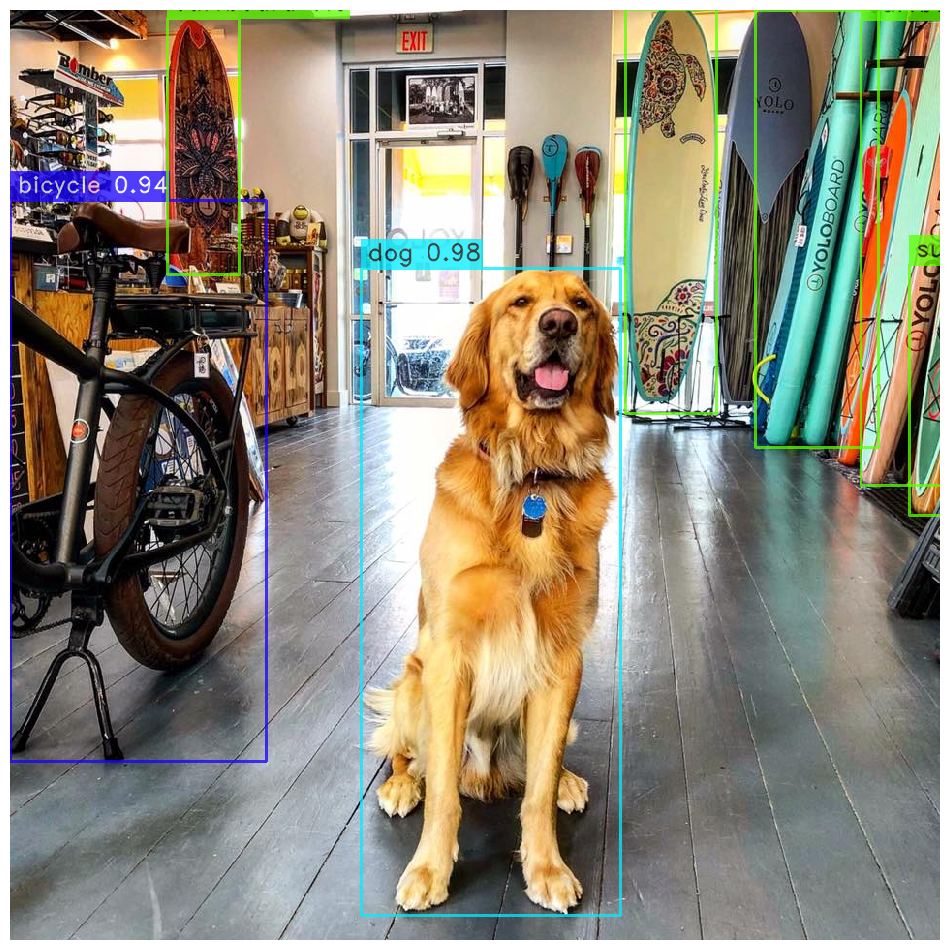

In [12]:
predictions = model.predict(image_path, iou=0.2, conf=0.25)
predictions.show()

Then, you can simply save the result.

In [6]:
predictions.save(output_folder="")  # Save in working directory

# 2. Semantic segmentation


For the sake of this presentation, We'll use Supervise.ly dataset that can be found [here](https://docs.supervise.ly/).

We will use PP-Lite-T model for inference.

### A. Load an image

In [ ]:
import requests
from PIL import Image
from io import BytesIO

# Image can be both uploaded to colab server or by a direct URL
url =  "https://s.hs-data.com/bilder/spieler/gross/128069.jpg"

# Load image from url
response = requests.get(url)

# Get PIL image
image = Image.open(BytesIO(response.content))

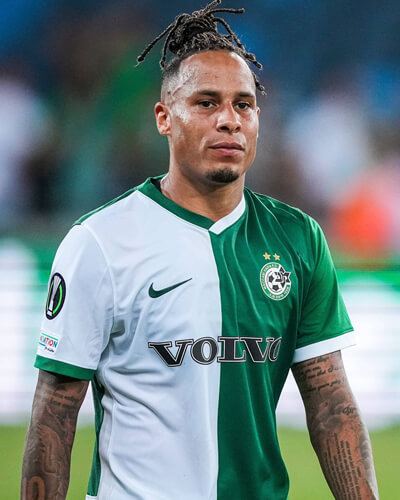

In [ ]:
# Visualize
print(image.size)
image

### Preprocess

In [ ]:
import torchvision.transforms as transforms
import torch

# Prepare preprcoess transformations
pre_proccess = transforms.Compose([
    transforms.Resize([640, 640]),
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406], [.229, .224, .225])
])

# Run preprocess on image. unsqueeze for [Batch x Channels x Width x Height] format
transformed_image = pre_proccess(image).unsqueeze(0)

(400, 500)


### B. Load a pretrained model


In [ ]:
# We will use weights that have been created with pp-lite-seg model on the supervise.ly dataset.
# Get pre-trained weights 
! wget "https://deci-pretrained-models.s3.amazonaws.com/ppliteseg/supervisely/pplite_t/ckpt_best.pth"

--2023-05-04 08:00:16--  https://deci-pretrained-models.s3.amazonaws.com/ppliteseg/supervisely/pplite_t/ckpt_best.pth
Resolving deci-pretrained-models.s3.amazonaws.com (deci-pretrained-models.s3.amazonaws.com)... 3.5.25.116, 52.217.168.145, 54.231.198.105, ...
Connecting to deci-pretrained-models.s3.amazonaws.com (deci-pretrained-models.s3.amazonaws.com)|3.5.25.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96694741 (92M) [binary/octet-stream]
Saving to: ‘ckpt_best.pth’

ckpt_best.pth        90%[=================>  ]  83.53M  23.7MB/s    eta 1s     

In [ ]:
# Get model from super-gradients repository.
model = models.get("pp_lite_t_seg",
                   num_classes=1,
                   checkpoint_path='ckpt_best.pth')

ckpt_best.pth       100%[===================>]  92.21M  26.5MB/s    in 6.4s    

2023-05-04 08:00:23 (14.4 MB/s) - ‘ckpt_best.pth’ saved [96694741/96694741]



[2023-05-04 08:00:23] INFO - checkpoint_utils.py - Successfully loaded model weights from ckpt_best.pth EMA checkpoint.


### C. Inferenece

In [ ]:
# Predict using SG model
model = model.eval()
mask = model(transformed_image)

### Postprocess

In [ ]:
# Run post-proccess - apply sigmoid to output probabilities, then apply hard
# threshold of 0.5 for binary mask prediction. 
mask = torch.sigmoid(mask).gt(0.5).squeeze()
mask = transforms.ToPILImage()(mask.float())

Text(0.5, 1.0, 'Original')

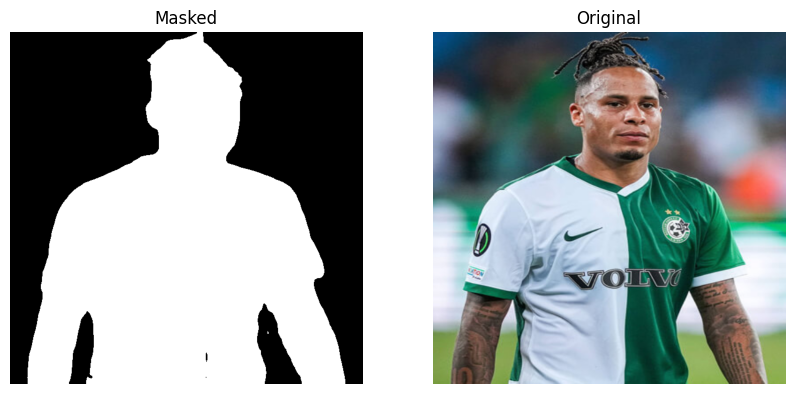

In [ ]:
# Visualize
import numpy as np
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)  
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title("Masked")
fig.add_subplot(1, 2, 2)  
plt.imshow(transforms.Resize([640, 640])(image))
plt.axis('off')
plt.title("Original")

# 3. Classification


For the sake of this presentation, We'll use ImageNet dataset that can be found [here](https://www.image-net.org/).

We will use ResNet-18 model for inference.

### A. Load an image

In [ ]:
import requests
from PIL import Image
from io import BytesIO

# Image can be both uploaded to colab server or by a direct URL
url = "https://images.unsplash.com/photo-1518717758536-85ae29035b6d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8NHx8ZG9nc3xlbnwwfHwwfHw%3D&w=1000&q=80"

# Load image from url
response = requests.get(url)

# Get PIL image
image = Image.open(BytesIO(response.content))

<class 'PIL.JpegImagePlugin.JpegImageFile'> (1000, 667)


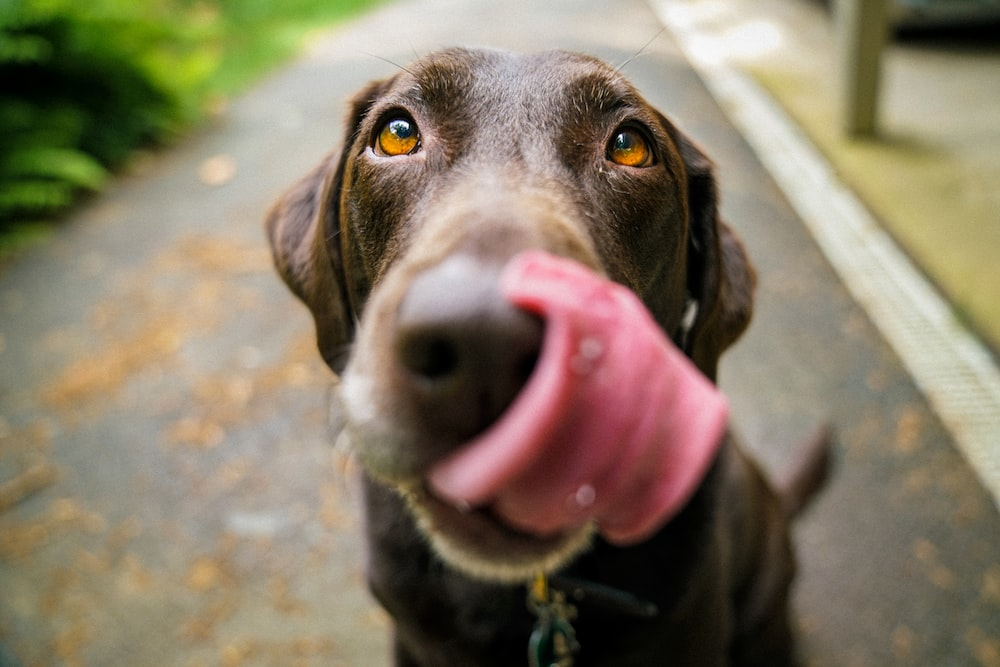

In [ ]:
# Visualize
print(type(image), image.size)
image

### Preprocess

In [ ]:
import torchvision.transforms as transforms

# Prepare preprcoess transformations
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
    transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010)),
    ])

# Run preprocess on image. unsqueeze for [Batch x Channels x Width x Height] format
input_tensor = preprocess(image).unsqueeze(0)

### B. Load a pretrained model

In [ ]:
# Get pretrained model
model = models.get("resnet18", pretrained_weights="imagenet", num_classes=1000)

Downloading: "https://sghub.deci.ai/models/resnet18_imagenet.pth" to /root/.cache/torch/hub/checkpoints/resnet18_imagenet.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

### C. Inference

In [ ]:
! wget "https://raw.githubusercontent.com/alexisbcook/ResNetCAM-keras/master/imagenet1000_clsid_to_human.txt"

--2023-05-04 08:00:27--  https://raw.githubusercontent.com/alexisbcook/ResNetCAM-keras/master/imagenet1000_clsid_to_human.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30564 (30K) [text/plain]
Saving to: ‘imagenet1000_clsid_to_human.txt’

imagenet1000_clsid_ 100%[===================>]  29.85K  --.-KB/s    in 0.001s  

2023-05-04 08:00:27 (20.6 MB/s) - ‘imagenet1000_clsid_to_human.txt’ saved [30564/30564]



In [ ]:
import json

# Parse image net text file with all classes (becuase we do not load the ImageNet dataset module, 
# we currently can not access the dataloaders dataset meta-data, including classes list) 
imagenet_classes = [None] * 1000
with open("imagenet1000_clsid_to_human.txt") as f:
  lines = f.readlines()
  for line in lines:
    id = line.split(":")[0].replace("{", "")
    classes = line.split(":")[1].replace(",", "")
    imagenet_classes[int(id)] = classes

In [ ]:
# Run predict
model.eval()

output = model(input_tensor)
predicted = imagenet_classes[torch.argmax(output)]

 'basset basset hound'



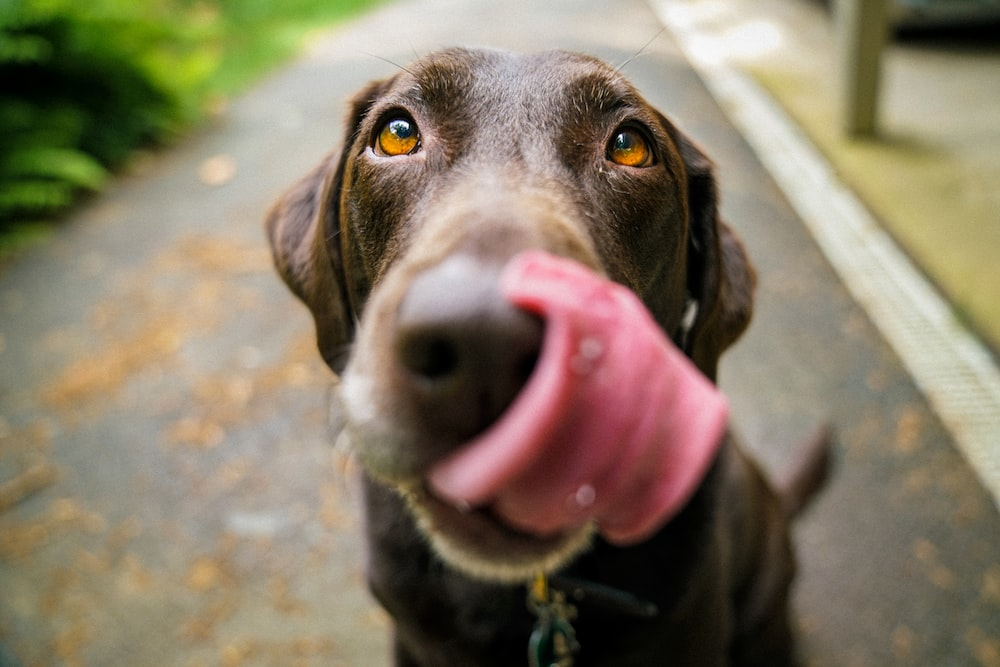

In [ ]:
print(predicted)
image